# Project_DataCleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import Data

In [2]:
car_rides = pd.read_csv('cab_rides.csv')
car_rides.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft


In [3]:
car_rides.shape

(693071, 10)

In [4]:
weather = pd.read_csv('weather.csv')
weather.head(3)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07


In [5]:
weather.shape

(6276, 8)

### Data Cleaning

In [6]:
car_rides['date_time'] = pd.to_datetime(car_rides['time_stamp']/1000, unit='s')
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')

#merge the datasets to refelect same time for a location
car_rides['merge_date'] = car_rides.source.astype(str) +" - "+ car_rides.date_time.dt.date.astype("str") +" - "+ car_rides.date_time.dt.hour.astype("str")
weather['merge_date'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

weather.index = weather['merge_date']

merged_df = car_rides.join(weather,on=['merge_date'],rsuffix ='_w')

In [7]:
data = merged_df[['price', 'distance', 'cab_type', 'destination', 'source', 'surge_multiplier', 'product_id', 'name',
                  'temp', 'clouds', 'rain', 'humidity', 'wind']]

data['day'] = merged_df.date_time.dt.dayofweek
data['hour'] = merged_df.date_time.dt.hour

<ipython-input-7-62048bcda11e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = merged_df.date_time.dt.dayofweek
<ipython-input-7-62048bcda11e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = merged_df.date_time.dt.hour


In [8]:
data.isnull().sum(axis = 0)

price                100909
distance                  0
cab_type                  0
destination               0
source                    0
surge_multiplier          0
product_id                0
name                      0
temp                   2964
clouds                 2964
rain                1061692
humidity               2964
wind                   2964
day                       0
hour                      0
dtype: int64

In [9]:
data = data.dropna(subset = ['price', 'temp', 'clouds', 'humidity', 'wind'])
data['rain'].fillna(0,inplace=True)

In [10]:
data.head(3)

,price,distance,cab_type,destination,source,surge_multiplier,product_id,name,temp,clouds,rain,humidity,wind,day,hour
0,5.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_line,Shared,38.46,0.29,0.0000,0.76,7.68,6,9
1,11.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_premier,Lux,44.31,1.00,0.1123,0.90,13.69,1,2
1,11.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_premier,Lux,43.82,0.99,0.0997,0.89,11.57,1,2


In [11]:
#data.to_csv('data.csv')

### Statistical summary of the data

In [12]:
data_describe = data.describe()
data_describe

,price,distance,surge_multiplier,temp,clouds,rain,humidity,wind,day,hour
count,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06
mean,1.654345e+01,2.189550e+00,1.015078e+00,3.925599e+01,6.802098e-01,1.115370e-02,7.537700e-01,7.694993e+00,2.388427e+00,1.055067e+01
std,9.325773e+00,1.136399e+00,9.511796e-02,5.470582e+00,2.996982e-01,5.107253e-02,1.195237e-01,3.447632e+00,1.743907e+00,7.393034e+00
min,2.500000e+00,2.000000e-02,1.000000e+00,1.962000e+01,0.000000e+00,0.000000e+00,4.500000e-01,2.900000e-01,0.000000e+00,0.000000e+00
25%,9.000000e+00,1.280000e+00,1.000000e+00,3.726000e+01,4.500000e-01,0.000000e+00,6.600000e-01,4.970000e+00,1.000000e+00,4.000000e+00
50%,1.350000e+01,2.150000e+00,1.000000e+00,3.961000e+01,7.600000e-01,0.000000e+00,7.200000e-01,8.800000e+00,2.000000e+00,1.000000e+01
75%,2.250000e+01,2.940000e+00,1.000000e+00,4.269000e+01,9.700000e-01,0.000000e+00,8.700000e-01,1.023000e+01,3.000000e+00,1.700000e+01
max,9.750000e+01,7.860000e+00,3.000000e+00,5.541000e+01,1.000000e+00,7.807000e-01,9.900000e-01,1.818000e+01,6.000000e+00,2.300000e+01


In [13]:
data.shape

(1164996, 15)

In [14]:
data_describe.to_csv('data_describe.csv')

### Feature display

Text(0, 0.5, 'Frequency')

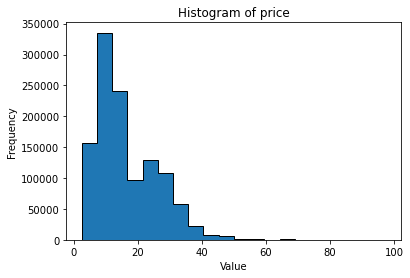

In [15]:
plt.hist(data['price'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of price")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

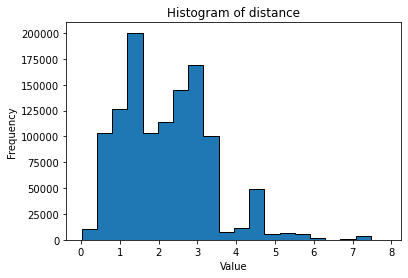

In [16]:
plt.hist(data['distance'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of distance")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

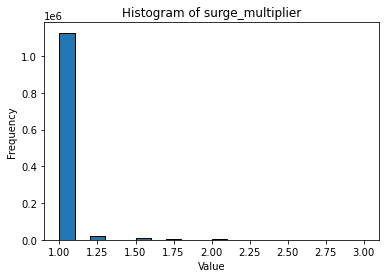

In [17]:
plt.hist(data['surge_multiplier'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of surge_multiplier")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

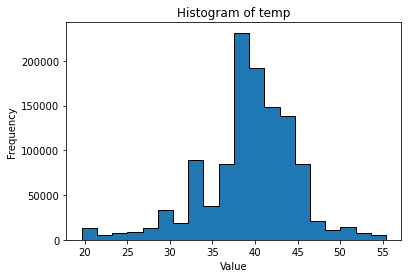

In [18]:
plt.hist(data['temp'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of temp")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

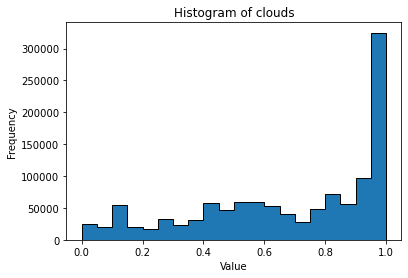

In [19]:
plt.hist(data['clouds'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of clouds")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

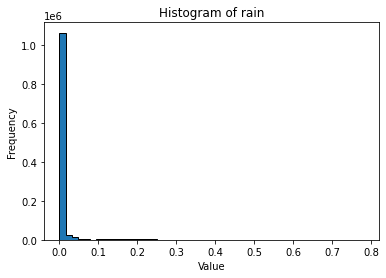

In [20]:
plt.hist(data['rain'], bins=50, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of rain")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

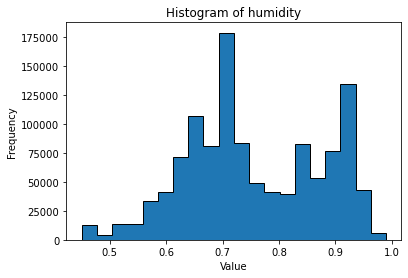

In [21]:
plt.hist(data['humidity'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of humidity")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

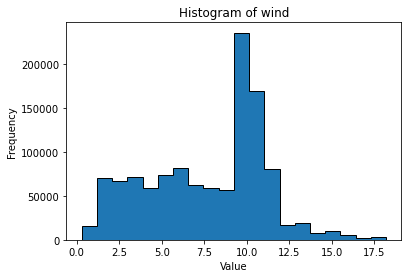

In [22]:
plt.hist(data['wind'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title("Histogram of wind")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

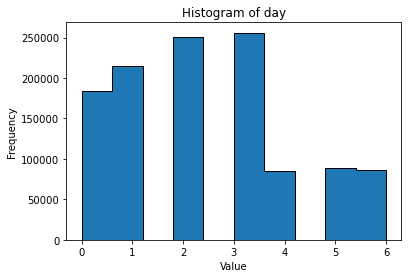

In [23]:
plt.hist(data['day'], histtype='stepfilled', edgecolor='black')
plt.title("Histogram of day")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

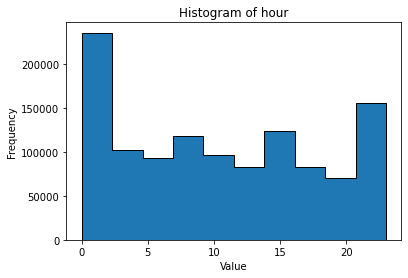

In [24]:
plt.hist(data['hour'], histtype='stepfilled', edgecolor='black')
plt.title("Histogram of hour")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [25]:
pd.DataFrame(data['cab_type'].value_counts(1))

,cab_type
Uber,0.518352
Lyft,0.481648


In [26]:
pd.DataFrame(data['destination'].value_counts(1))

,destination
Financial District,0.084811
Boston University,0.083999
South Station,0.083599
Back Bay,0.083566
North End,0.083468
Beacon Hill,0.083335
Fenway,0.083292
West End,0.083246
Northeastern University,0.083191
Haymarket Square,0.082994


In [27]:
pd.DataFrame(data['source'].value_counts(1))

,source
Financial District,0.085363
Northeastern University,0.083549
Beacon Hill,0.083535
Haymarket Square,0.083409
Back Bay,0.083404
North End,0.083360
Boston University,0.083266
South Station,0.083220
West End,0.083167
Theatre District,0.082829


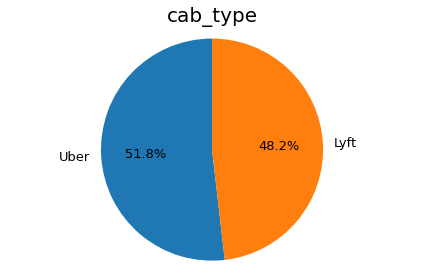

In [28]:
count = pd.DataFrame(data['cab_type'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['cab_type'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 13}
    )
plt.axis('equal')
plt.title('cab_type', fontsize = 20)
plt.tight_layout()
plt.show()

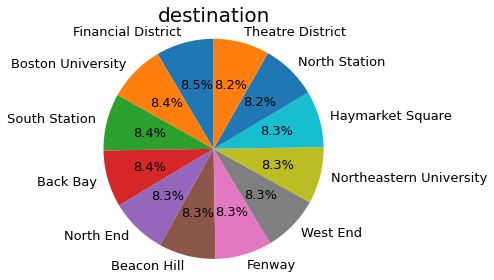

In [29]:
count = pd.DataFrame(data['destination'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['destination'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 13}
    )
plt.axis('equal')
plt.title('destination', fontsize = 20)
plt.tight_layout()
plt.show()

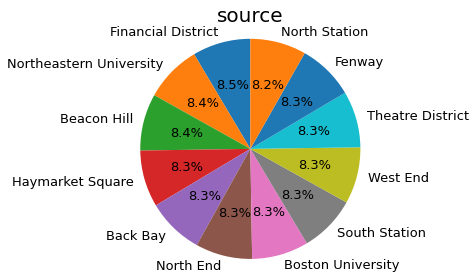

In [30]:
count = pd.DataFrame(data['source'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['source'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 13}
    )
plt.axis('equal')
plt.title('source', fontsize = 20)
plt.tight_layout()
plt.show()

In [31]:
Lyft = data[data['cab_type'].isin(['Lyft'])]
Uber = data[data['cab_type'].isin(['Uber'])]

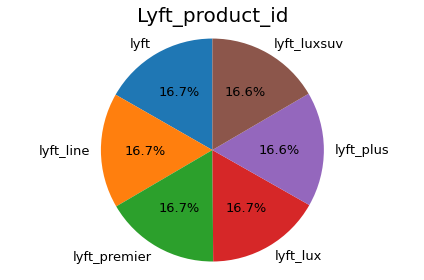

In [32]:
count = pd.DataFrame(Lyft['product_id'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['product_id'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 13}
    )
plt.axis('equal')
plt.title('Lyft_product_id', fontsize = 20)
plt.tight_layout()
plt.show()

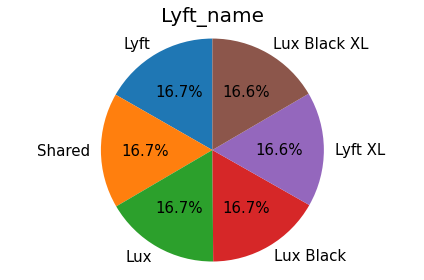

In [33]:
count = pd.DataFrame(Lyft['name'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['name'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 15}
    )
plt.axis('equal')
plt.title('Lyft_name', fontsize = 20)
plt.tight_layout()
plt.show()

<ipython-input-34-557bac9a92c7>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


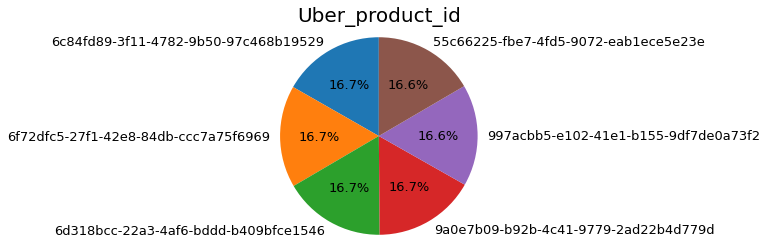

In [34]:
count = pd.DataFrame(Uber['product_id'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['product_id'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 13}
    )
plt.axis('equal')
plt.title('Uber_product_id', fontsize = 20)
plt.tight_layout()
plt.show()

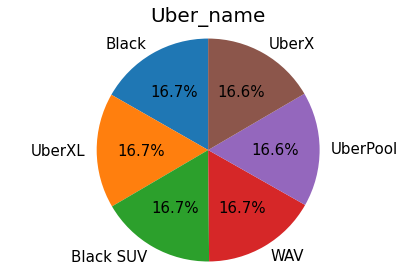

In [35]:
count = pd.DataFrame(Uber['name'].value_counts())
#fig, ax = plt.subplots(figsize=(4,4))
plt.pie(
    count['name'],
    labels=count.index,
    shadow=False,
    #explode=(0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 15}
    )
plt.axis('equal')
plt.title('Uber_name', fontsize = 20)
plt.tight_layout()
plt.show()

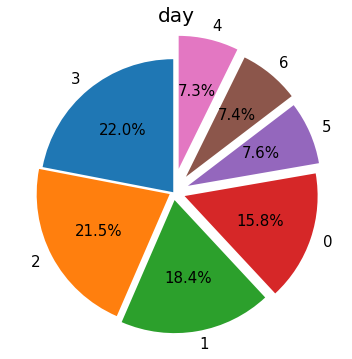

In [36]:
count = pd.DataFrame(data['day'].value_counts())
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(
    count['day'],
    labels=count.index,
    shadow=False,
    explode=(0, 0.03,0.06,0.09,0.12,0.15,0.18),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 15}
    )
plt.axis('equal')
plt.title('day', fontsize = 20)
plt.tight_layout()
plt.show()

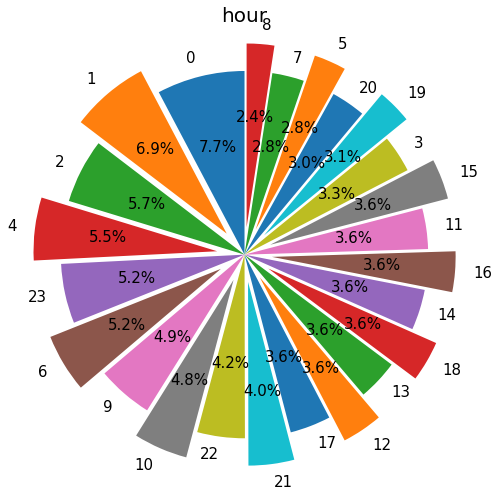

In [37]:
count = pd.DataFrame(data['hour'].value_counts())
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(
    count['hour'],
    labels=count.index,
    shadow=False,
    explode=(0, 0.15, 0, 0.15, 0, 0.15, 0, 0.15, 0, 0.15, 0, 0.15, 0, 0.15, 0, 0.15, 
             0, 0.15, 0, 0.15, 0, 0.15, 0, 0.15),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 15}
    )
plt.axis('equal')
plt.title('hour', fontsize = 20)
plt.tight_layout()
plt.show()